In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.** Load the data set ”Automative Yearbook” into your python program.

In [2]:
df = pd.read_csv('/content/Automative Yearbook.csv')

In [3]:
df

make fuel-type num-of-cylinders horsepower peak-rpm  city-mpg  \
0    alfa-romero       gas             four        111     5000        21   
1    alfa-romero       gas             four        111     5000        21   
2    alfa-romero       gas              six        154     5000        19   
3           audi       gas             four        102     5500        24   
4           audi       gas             five        115     5500        18   
..           ...       ...              ...        ...      ...       ...   
200        volvo       gas             four        114     5400        23   
201        volvo       gas             four        160     5300        19   
202        volvo       gas              six        134     5500        18   
203        volvo    diesel              six        106     4800        26   
204        volvo       gas             four        114     5400        19   

     highway-mpg  price  
0             27  13495  
1             27  16500  
2             26  16500  
3             30  13950  
4             22  17450  
..           ...    ...  
200           28  16845  
201           25  19045  
202           23  21485  
203           27  22470  
204           25  22625  

[205 rows x 8 columns]

**2.** Create two data set of Highway-mpg for Diesel and Gas.

In [4]:
diesel_cars =df[df['fuel-type']=='diesel'][['fuel-type','highway-mpg']]
gas_cars =df[df['fuel-type']=='gas'][['fuel-type','highway-mpg']]

# display the data set
print('highway mpg for diesel cars')
print(diesel_cars)

print('\nhighway mpg for gas cars ')
print(gas_cars)


highway mpg for diesel cars
    fuel-type  highway-mpg
63     diesel           42
66     diesel           39
67     diesel           25
68     diesel           25
69     diesel           25
70     diesel           25
90     diesel           50
108    diesel           33
110    diesel           25
112    diesel           33
114    diesel           25
116    diesel           33
158    diesel           36
159    diesel           47
174    diesel           33
182    diesel           46
184    diesel           46
187    diesel           42
192    diesel           38
203    diesel           27

highway mpg for gas cars 
    fuel-type  highway-mpg
0         gas           27
1         gas           27
2         gas           26
3         gas           30
4         gas           22
..        ...          ...
199       gas           22
200       gas           28
201       gas           25
202       gas           23
204       gas           25

[185 rows x 2 columns]


**3.** Take 20 random samples from each data set.


In [5]:
# 20 sample data
random_samples_diesel = diesel_cars.sample(n=20, random_state=3)   #  here we use the random_state because if you run the code multiple times, then we find the  same random samples each time
# for gas
random_samples_gas = gas_cars.sample(n=20, random_state=3)
print('20 sample data  for diesel')
print(random_samples_diesel)
print('\n')
print('\n20 sample data  for gas ')
print('\n')
print(random_samples_gas)

20 sample data  for diesel
    fuel-type  highway-mpg
174    diesel           33
67     diesel           25
66     diesel           39
187    diesel           42
69     diesel           25
184    diesel           46
90     diesel           50
108    diesel           33
182    diesel           46
158    diesel           36
112    diesel           33
116    diesel           33
203    diesel           27
192    diesel           38
159    diesel           47
70     diesel           25
63     diesel           42
110    diesel           25
68     diesel           25
114    diesel           25



20 sample data  for gas 


    fuel-type  highway-mpg
25        gas           38
3         gas           30
79        gas           30
189       gas           29
47        gas           19
124       gas           24
6         gas           25
160       gas           47
88        gas           30
65        gas           27
111       gas           24
165       gas           29
38        gas           3

**4.** Give a summary of these two data sets. Compare the box-plot of each data
sets and interpret your observations.


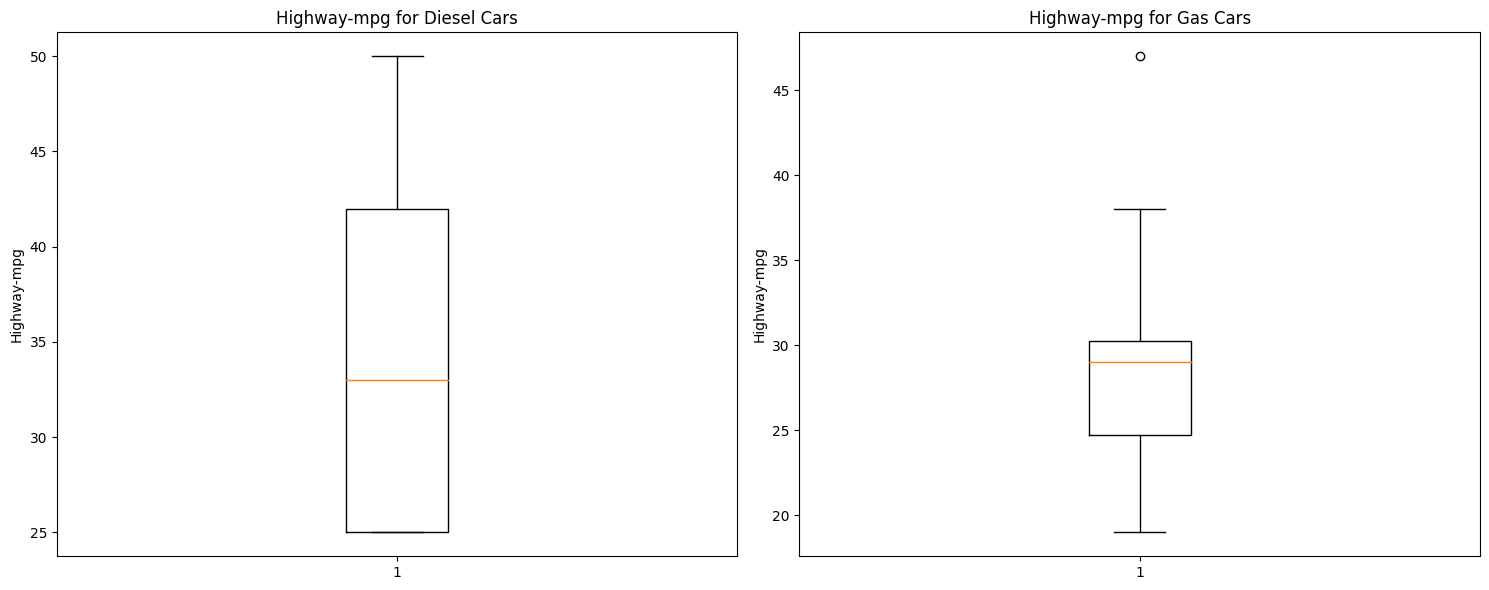

In [6]:
# Box plot for Diesel cars
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.boxplot(random_samples_diesel['highway-mpg'])
plt.title('Highway-mpg for Diesel Cars')
plt.ylabel('Highway-mpg')

# Box plot for Gas cars
plt.subplot(1, 2, 2)
plt.boxplot(random_samples_gas['highway-mpg'])
plt.title('Highway-mpg for Gas Cars')
plt.ylabel('Highway-mpg')

plt.tight_layout()
plt.show()


**1.** In the above  two box plots. The horizontal line inside each box represents the median. A higher median indicates that, on average, one fuel type has higher highway mileage.Hence the diesel car give the more mileage than the gas car.

**2.** The box represents the IQR, which is the range in which the middle 50% of the data lies. Compare the lengths of the boxes. A longer box generally indicates greater variability. hence we see in box plot diesel carvriability is grater than the gas car


**5.** Test whether the average mileage of both the data sets are equal or not at
level 5% of significance. Explain the procedure completely and interpret your
results.

In [7]:
# mean of the diesel cars
sum =0
sum1 = 0
for i in random_samples_diesel['highway-mpg']:
  sum = sum+i
average = sum/(len(random_samples_diesel))
print('average of the diesel cars',average)

# mean of the gas cars
for i in random_samples_gas['highway-mpg']:
  sum1 = sum1+i
average1 = sum1/(len(random_samples_gas))
print('average of the gas cars', average1)

average of the diesel cars 34.75
average of the gas cars 29.05


In [8]:
import math
std=0
std1=0
for x in random_samples_diesel['highway-mpg']:
  std +=((x - average) ** 2)
std_diesel = math.sqrt(std/(len(random_samples_diesel)-1) )

for y in random_samples_gas['highway-mpg']:
  std1 +=((y - average1) ** 2)
std_gas = math.sqrt(std1/(len(random_samples_gas)-1) )

# standard deviation of diesel cars
print(std_diesel)
# standard deviation of gas cars
print(std_gas)


8.626001086067756
6.065215750924542


In [9]:
# Calculate the t-statistic
n_diesel= len(random_samples_diesel)
n_gas = len(random_samples_gas)
df1 =  (len(random_samples_diesel)+len(random_samples_gas)-2)
t_statistic = (average - average1) / math.sqrt((std_diesel**2 / n_diesel) + (std_gas**2 / n_gas))
critical_value  = 2.042

In [10]:
t_statistic

2.41739565860589

In [13]:
# Compare t-statistic with critical value
if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis. There is enough evidence to suggest that the average mileage is different for diesel and gas cars.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in average mileage for diesel and gas cars.")


Reject the null hypothesis. There is enough evidence to suggest that the average mileage is different for diesel and gas cars.


**6**. Consider the whole data sets created in Step 2 (Here the no. of samples are
not equal).

In [15]:
print('highway mpg for diesel cars')
print(diesel_cars)

print('\nhighway mpg for gas cars ')
print(gas_cars)

highway mpg for diesel cars
    fuel-type  highway-mpg
63     diesel           42
66     diesel           39
67     diesel           25
68     diesel           25
69     diesel           25
70     diesel           25
90     diesel           50
108    diesel           33
110    diesel           25
112    diesel           33
114    diesel           25
116    diesel           33
158    diesel           36
159    diesel           47
174    diesel           33
182    diesel           46
184    diesel           46
187    diesel           42
192    diesel           38
203    diesel           27

highway mpg for gas cars 
    fuel-type  highway-mpg
0         gas           27
1         gas           27
2         gas           26
3         gas           30
4         gas           22
..        ...          ...
199       gas           22
200       gas           28
201       gas           25
202       gas           23
204       gas           25

[185 rows x 2 columns]


**7.** Give summary of the new data sets. Create Box-plots and interpret your observations


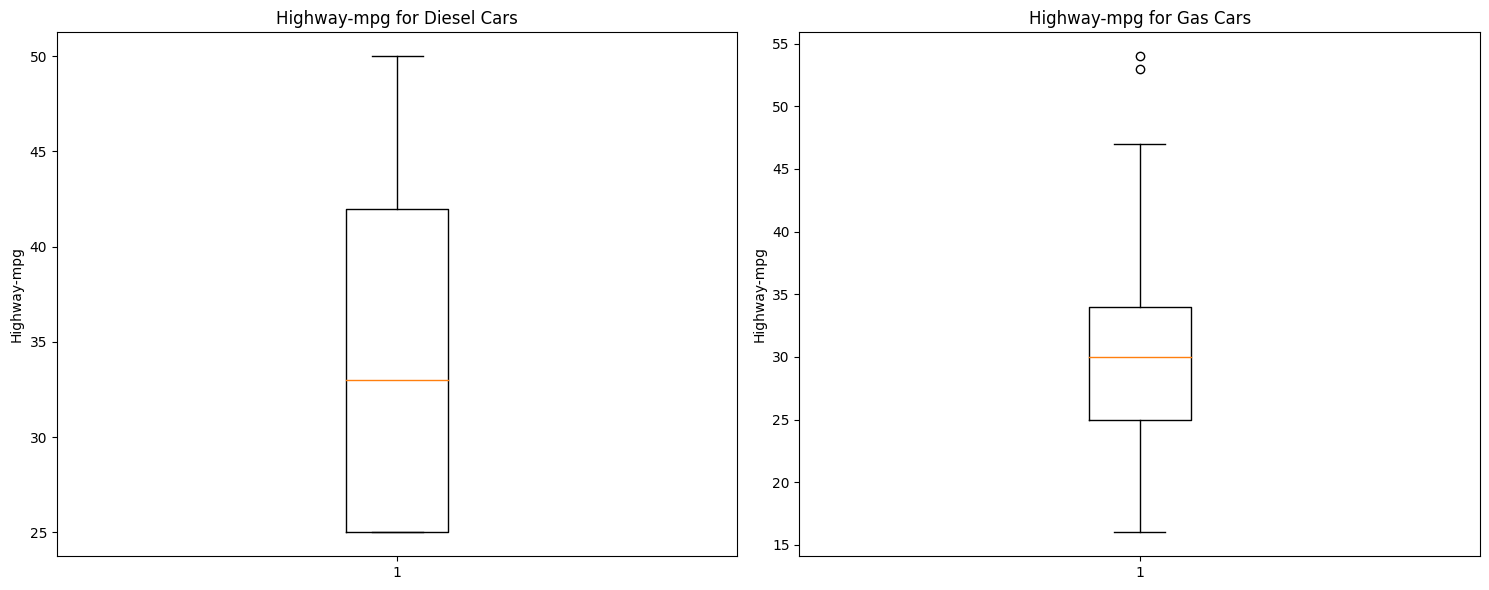

In [16]:
# Box plot for Diesel cars
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.boxplot(diesel_cars['highway-mpg'])
plt.title('Highway-mpg for Diesel Cars')
plt.ylabel('Highway-mpg')

# Box plot for Gas cars
plt.subplot(1, 2, 2)
plt.boxplot(gas_cars['highway-mpg'])
plt.title('Highway-mpg for Gas Cars')
plt.ylabel('Highway-mpg')

plt.tight_layout()
plt.show()

**1.** In the above two box plots. The horizontal line inside each box represents the median. A higher median indicates that, on average, one fuel type has higher highway mileage.Hence the diesel car give the more mileage than the gas car.

**2.** The box represents the IQR, which is the range in which the middle 50% of the data lies. Compare the lengths of the boxes. A longer box generally indicates greater variability. hence we see in box plot diesel carvriability is grater than the gas car

**8.** Test at level 5% of significance that the average mileage of both the data sets
are equal or not. Explain the procedure completely and interpret your results.

In [17]:
# mean of the diesel cars
sum =0
sum1 = 0
for i in diesel_cars['highway-mpg']:
  sum = sum+i
average = sum/(len(diesel_cars))
print('average of the diesel cars',average)

# mean of the gas cars
for i in gas_cars['highway-mpg']:
  sum1 = sum1+i
average1 = sum1/(len(gas_cars))
print('average of the gas cars', average1)

average of the diesel cars 34.75
average of the gas cars 30.318918918918918


In [18]:
import math
std=0
std1=0
for x in diesel_cars['highway-mpg']:
  std +=((x - average) ** 2)
std_diesel = math.sqrt(std/(len(diesel_cars)-1) )

for y in gas_cars['highway-mpg']:
  std1 +=((y - average1) ** 2)
std_gas = math.sqrt(std1/(len(gas_cars)-1) )

# standard deviation of diesel cars
print(std_diesel)
# standard deviation of gas cars
print(std_gas)

8.626001086067756
6.555027851142945


In [19]:
n_diesel= len(diesel_cars)
n_gas =   len(gas_cars)
df1 =  (len(diesel_cars)+len(gas_cars)-2)
t_statistic = (average - average1) / math.sqrt((std_diesel**2 / n_diesel) + (std_gas**2 / n_gas))
critical_value  = 2.042

# Compare t-statistic with critical value
if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis. There is enough evidence to suggest that the average mileage is different for diesel and gas cars.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in average mileage for diesel and gas cars.")


Reject the null hypothesis. There is enough evidence to suggest that the average mileage is different for diesel and gas cars.


In [20]:
t_statistic

2.2287695748611114

## F test


Calculate the F-statistic:
F = $\frac{s_1^2}{s_2^2}$


In [21]:
var_diesel= (std_diesel**2)
var_gas =  (std_gas**2)


In [22]:
# Calculate the F-statistic
var_diesel= (std_diesel**2)
var_gas =  (std_gas**2)
F_statistic = var_diesel / var_gas
print(F_statistic)

1.7316891443455174


In [23]:
# Degrees of freedom for each group
n_diesel= len(diesel_cars)-1
n_gas =   len(gas_cars)-1
# using the degree of freedom of diesel and gas  car the critical f value as below

Critical_F_value = 1.64336269
print(Critical_F_value)
print(n_diesel)
print(n_gas)

1.64336269
19
184


In [24]:
# Compare F-statistic with critical value
if F_statistic >Critical_F_value :
    print("Reject the null hypothesis. There is enough evidence to suggest that the average mileage is different for diesel and gas cars.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in average mileage for diesel and gas cars.")


Reject the null hypothesis. There is enough evidence to suggest that the average mileage is different for diesel and gas cars.


#*PROCEDURE*



* *Null Hypothesis* (H0): The average mileage of gas vehicles is equal to the average mileage of diesel vehicles.
* *Alternative Hypothesis* (H1): The average mileage of gas vehicles is not equal to the average mileage of diesel vehicles.


* Then we calculated the *sample mean* and *sample variance*  for both the mileage groups.


* We calculated the *t-statistic*.
The t-statistic formula is given by: $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$ .

   Here, $\bar{x}_1$ and $\bar{x}_2$ are the *sample means*, ${s}_1^2$ and ${s}_2^2$
 are the *sample variances, and ${n}_1$ and ${n}_2$ are the **sample sizes*
* Calculate the *degrees of freedom* using the formula: $n_{1}$+ $n_{2}$ - 2

* Then we determined the *critical t-value* for a two-tailed test at a 5% significance level from the t-table and compared *T-Statistic and Critical T-Value*:

* If *t-statistic > critical t-value, then we  **reject* the null hypothesis.

* If *t-statistic* ≤ *critical t-value,  then we **fail to reject* the null hypothesis. there no enough information to reject the null hypothesis


##*INTERPRETATION*
Since the *null hypothesis is rejected*, it suggests evidence that the average mileage of gas and diesel vehicles is significantly different.

##Exercise 2

Exercise 2 The average of grade point averages (GPAs) of college courses
in a specific major is a measure of difficulty of the major. An educator wishes to conduct a study to find out whether the difficulty levels of different majors are the same.


Perform the following steps:

**1.** Load the data set ”Grade Sheet” into your python program

In [25]:
df3 = pd.read_excel('/content/Grade Sheet.xlsx')

In [26]:
df3

Mathematics  English  Education  Biology
0          2.59     3.64       4.00     2.78
1          3.13     3.19       3.59     3.51
2          2.97     3.15       2.80     2.65
3          2.50     3.78       2.39     3.16
4          2.53     3.03       3.47     2.94
5          3.29     2.61       3.59     2.32
6          2.53     3.20       3.74     2.58
7          3.17     3.30       3.77     3.21
8          2.70     3.54       3.13     3.23
9          3.88     3.25       3.00     3.57
10         2.64     4.00       3.47     3.22

**2.** Write the hypothesis for testing whether the data contain sufficient evidence
to conclude that there are differences among the average major GPAs of these
four majors

To test whether there are differences among the average major GPAs of the four majors (Mathematics, English, Education, Biology), you can use a one-way ANOVA (Analysis of Variance) test. The null hypothesis ($H_{0}$) and the alternative hypothesis ($H_{1}$) are formulated as follows:


**Null Hypothesis ($H_{0}$)**: There is no significant difference among the average major GPAs of Mathematics, English, Education, and Biology.


\$
H_0: \mu_{\text{Math}} = \mu_{\text{English}} = \mu_{\text{Education}} = \mu_{\text{Biology}}
$


**Alternative Hypothesis ($H_{1}$)**: There is a significant difference among the average major GPAs of Mathematics, English, Education, and Biology.

\$
H_1: \text{At least one mean is different}
$



**3.** Test at the 5% level of significance of your hypothesis. Write the testing procedure in details.


In [27]:

math_gpa = np.array(df3['Mathematics'])
english_gpa = np.array(df3['English'])
education_gpa = np.array(df3['Education'])
biology_gpa = np.array(df3['Biology'])

#Calculate group means
mean_math = np.mean(math_gpa)
mean_english = np.mean(english_gpa)
mean_education = np.mean(education_gpa)
mean_biology = np.mean(biology_gpa)

#Calculate overall mean
overall_mean = np.mean(np.concatenate([math_gpa, english_gpa, education_gpa, biology_gpa]))

#Calculate Sum of Squares Within Groups (SSW)
ssw = np.sum((math_gpa - mean_math)**2) + np.sum((english_gpa - mean_english)**2) + \
      np.sum((education_gpa - mean_education)**2) + np.sum((biology_gpa - mean_biology)**2)

#Calculate Sum of Squares Between Groups (SSB)
ssb = len(math_gpa) * (mean_math - overall_mean)**2 + len(english_gpa) * (mean_english - overall_mean)**2 + \
      len(education_gpa) * (mean_education - overall_mean)**2 + len(biology_gpa) * (mean_biology - overall_mean)**2

#Calculate Degrees of Freedom
df_between = 4 - 1
df_within = len(math_gpa) + len(english_gpa) + len(education_gpa) + len(biology_gpa) - 4

#Calculate Mean Squares
msb = ssb / df_between
msw = ssw / df_within

#Calculate F-Statistic
f_statistic = msb / msw

#Determine Critical Value
alpha = 0.05
critical_value = 2.389

#Compare F-Statistic and Critical Value
if f_statistic > critical_value:
    print("Reject the null hypothesis. There is enough evidence to suggest that there are differences among the average major GPAs.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest differences among the average major GPAs.")


Reject the null hypothesis. There is enough evidence to suggest that there are differences among the average major GPAs.


**4.** Procedure .

**Null Hypothesis ($H_{0}$)**: There is no significant difference among the average major GPAs of Mathematics, English, Education, and Biology.


\$
H_0: \mu_{\text{Math}} = \mu_{\text{English}} = \mu_{\text{Education}} = \mu_{\text{Biology}}
$


**Alternative Hypothesis ($H_{1}$)**: There is a significant difference among the average major GPAs of Mathematics, English, Education, and Biology.

\$
H_1: \text{At least one mean is different}
$


Choose the Significance Level (α):

* Choose a significance level for the test. Common choices include 0.05, which corresponds to a 5% level of significance.
α=0.05

Collect Data and Calculate Group Means:

* Collect the GPAs for Mathematics, English, Education, and Biology.
* Calculate the mean GPA for each major.

Calculate Overall Mean ( $\bar{x}_{overall}$ ):

* Calculate the overall mean GPA across all majors.


Calculate Sum of Squares Within Groups (SSW):

* Calculate the sum of squared differences between each GPA and its group mean.

Calculate Sum of Squares Between Groups (SSB):

* Calculate the sum of squared differences between each group mean and the overall mean.

Calculate Degrees of Freedom:

* Degrees of Freedom Between (df_between) = Number of Groups - 1
* Degrees of Freedom Within (df_within) = Total Number of Observations - Number of Groups


Calculate Mean Squares:

* Mean Square Between (MSB) = SSB / df_between
* Mean Square Within (MSW) = SSW / df_within


Calculate F-Statistic:

* Calculate the F-statistic using the formula: F= MSW / MSB


Compare F-Statistic and Critical Value:

* If F > Critical Value, reject $H_{0}$
* If F≤ Critical Value, fail to reject  $H_{0}$


**Interpret the  result.**

 From the above test we find the result ,Reject the null hypothesis. There is enough evidence to suggest that there are differences among the average major GPAs.

##Exercise 3

**Exercise 3.** The income tax department has recorded the following income of a doctor for eight days as:
Day No. 1 2 3 4 5 6 7 8
Income (Rs.) 1000 800 950 1200 1300 785 1050 400
Assuming that the daily income is normally distributed, test the hypothesis that
the mean daily income is Rs. 1000 ?

In [28]:
from scipy.stats import t
daily_income = np.array([1000, 800, 950, 1200, 1300, 785, 1050, 400])
hypothesized_mean= 1000

sample_mean = np.mean(daily_income)
sample_std = np.std(daily_income, ddof=1)
n = len(daily_income)
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))
df = n - 1
alpha = 0.05
critical_value_lower = t.ppf(alpha/2, df)
critical_value_upper = t.ppf(1 - alpha/2, df)

if t_statistic < critical_value_lower or t_statistic > critical_value_upper:
    print("Reject the null hypothesis. The mean daily income is not Rs. 1000.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest the mean daily income is different from Rs. 1000.")

p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
if p_value < alpha:
    print("Reject the null hypothesis based on p-value.")
else:
    print("Fail to reject the null hypothesis based on p-value.")


Fail to reject the null hypothesis. There is not enough evidence to suggest the mean daily income is different from Rs. 1000.
Fail to reject the null hypothesis based on p-value.


**observation:-**   from the test we find the above observations,
  therefore we fail to reject the null hypothesis. According to data we don't have sufficient information that the mean of daily income is not 1000. But this might not mean that the mean is exactly 1000, to provide a concrete insight, we can provide a confidence interval around 1000 that will encompass the true parameter with higher probability

##Exercise 4

The following data show the time taken in minutes by five
pain relieving drugs A, B, C,D and E to cure the pain of 20 patients. Each drug
was taken by four patients. At 5% level of significance, test whether there is any
difference in efficacy in the five pain relieving drugs.
A B C D E
13 11 13 12 12
12 10 14 11 12
14 13 13 10 11
12 12 14 12 14


In [29]:
import numpy as np
data = np.array([
                [13, 12, 14, 12],
                [11, 10, 13, 12],
                [13, 14, 13, 14],
                [12, 11, 10, 12],
                [12, 12, 11, 14]
               ])

#Calculate Sample Means
mean_times = np.mean(data, axis=1)
#Calculate Overall Mean
overall_mean = np.mean(data)
#Calculate SSB and SSW
ssb = np.sum(data.shape[1] * (mean_times - overall_mean)**2)
ssw = np.sum((data - mean_times.reshape(-1, 1))**2)

#Calculate Degrees of Freedom
df_between = data.shape[0] - 1
df_within =15
#Calculate Mean Squares
ms_between = ssb / df_between
ms_within = ssw / df_within
#Calculate F-Statistic
f_statistic = ms_between / ms_within
#Determine Critical Value
alpha = 0.05
critical_value = 3.055

#Compare F-Statistic and Critical Value
if f_statistic > critical_value:
    print("Reject the null hypothesis. There is enough evidence to suggest a difference in efficacy among the drugs.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a difference in efficacy among the drugs.")
f_statistic

Reject the null hypothesis. There is enough evidence to suggest a difference in efficacy among the drugs.


3.1153846153846154